# Data Science para Iniciantes: IRIS

Todo ser humano que se aventure pela longa estrada da Data Science já se deparou com o dataset iris. Esse dataset mostra um conjunto de medidas das pétalas e sépalas de três espécies de flores: setosa, versicolor e virginica.
O objetivo nesse artigo é fazer uma pequena análise do dataset, utilizando a linguagem Python. Após a análise, partiremos para aplicação de Machine Learning para prever, de acordo com as medidas das pétalas e sépalas, qual das três espécies pertence uma nova flor. Nessa parte iremos comparar alguns modelos preditivos e escolher o que entrega o melhor resultado.
Para prosseguir com a análise e predições, utilizaremos os seguintes pacotes:
    
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Sklearn


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

## Análise Exploratória

Carregar o dataset, instanciando como iris e nomeando variáveis (de acordo com o dicionário do dataset). Damos um head() para retornar as 5 primeiras linhas.

In [2]:
df_iris = pd.read_csv('data/iris.csv', 
                      sep=",")

In [3]:
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


O resultado mostra os comprimentos (length) e larguras (width) das pétalas e sépalas das iris, indicando — na última coluna — a que espécie tais medidas pertencem.
Carregado o dataset, podemos dar uma olhada em alguns detalhes do mesmo. Queremos ver um resumo estatístico. Para isso utilizaremos o describe(). Utilizei .T para fazer a transposta do dataset (transformar linhas em colunas e vice versa).

In [4]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


O resultado mostra algumas medidas estatísticas como a contagem total, as médias, os desvios-padrão, os quartis, além dos valores mínimo e máximo das observações.
Observe que na coluna count, o resultado foi unanimamente 150. Isso pode indicar que não há valores missing ou há quantidade de linhas iguais com valores missing. Podemos verificar isso da seguinte maneira.

In [5]:
df_iris.shape

(150, 5)

Perfeito. Existem 150 linhas e 5 colunas. O count está correto e não há valores missing. Mas para ter mais certeza…
…verificamos de outra maneira.

In [6]:
df_iris.isna().any()

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Opa! Que tal uns gráficos?

O gráfico mais famoso para a primeira plotagem do dataset iris é o scatterplot (gráfico de dispersão).
Para isso, utilizaremos o pacote seaborn para plotagem do gráfico e o matplotlib para definir tamanho da figura, título e nomes dos eixo x e y.
Os gráficos abaixo mostram as relações das medidas de largura e comprimento de pétalas e sépalas de cada espécie (vide legenda).

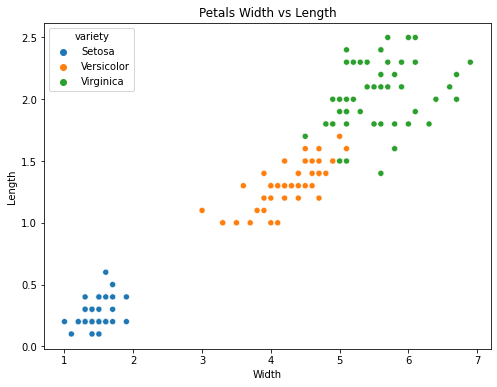

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_iris,
                x = 'petal.length', 
                y = 'petal.width',
               hue = 'variety')
plt.title('Petals Width vs Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

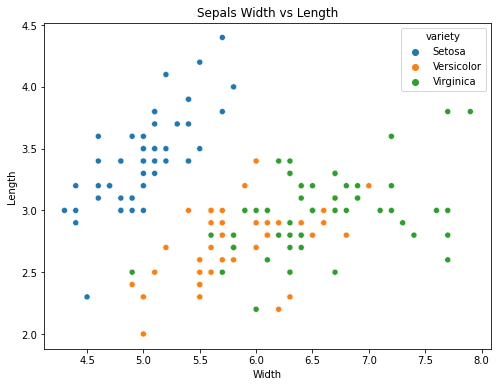

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_iris,
                x = 'sepal.length', 
                y = 'sepal.width',
               hue = 'variety')
plt.title('Sepals Width vs Length')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

Se, por exemplo, pegarmos o grupo azul (setosas), veremos que as medidas das pétalas e sépalas variam de acordo com a tabela abaixo.


Outro gráfico, também muito utilizado, é o histograma. Nesse gráfico podemos descobrir como as medidas estão distribuídas.

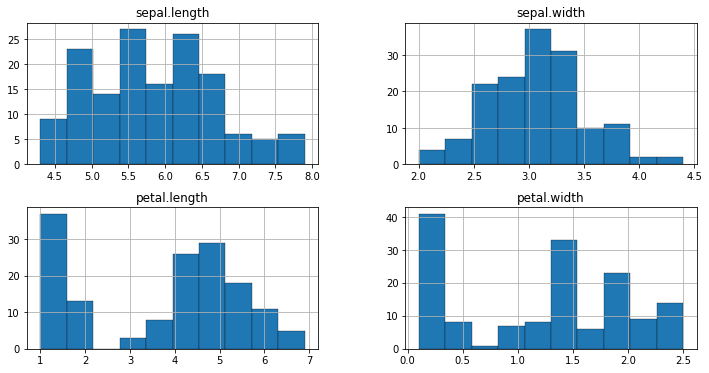

In [10]:
df_iris.hist(figsize = (12,6), edgecolor = 'black', linewidth = 0.3)
plt.show()

Já ouviu falar no pairplot()? Ele mostra todas as relações em pares e as distribuições marginais.

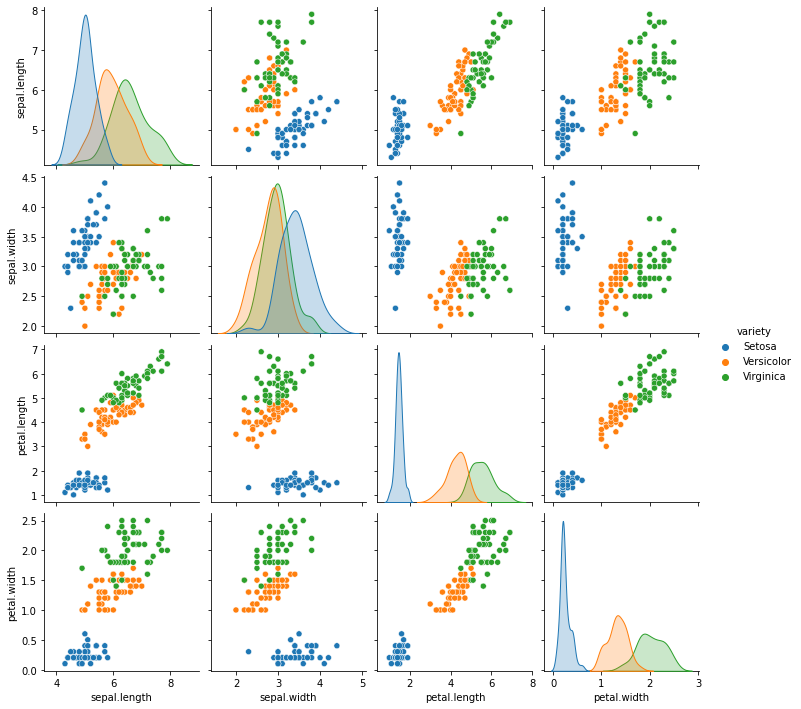

In [11]:
sns.pairplot(df_iris, hue = 'variety')

## Modelo Preditivo

Descobrir espécies é um problema de classificação. Utilizaremos quatro modelos de machine learning e compararemos os resultados de cada um para saber qual o que teve a melhor predição.
Importaremos agora os três modelos (SVM, Regressão Logística, KNN e Decision Tree). Além disso importaremos pacotes de métricas e divisão de treino e teste.

In [12]:
# divisão treino-teste

from sklearn.model_selection import train_test_split

# algoritmos de machine learning para testar

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metricas de desempenho e comparação

from sklearn import metrics

Além disso, vamos criar uma nova coluna “species_num” para saber se a transformação acima foi realizada de forma correta. Utilizaremos o sample(5) para mostrar 5 exemplos aleatórios para fins de comparação.

In [13]:
transform = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
df_iris['variety_num'] = df_iris['variety'].map(transform)

In [14]:
df_iris.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_num
137,6.4,3.1,5.5,1.8,Virginica,2
96,5.7,2.9,4.2,1.3,Versicolor,1
48,5.3,3.7,1.5,0.2,Setosa,0
132,6.4,2.8,5.6,2.2,Virginica,2
69,5.6,2.5,3.9,1.1,Versicolor,1
67,5.8,2.7,4.1,1.0,Versicolor,1
16,5.4,3.9,1.3,0.4,Setosa,0
61,5.9,3.0,4.2,1.5,Versicolor,1
91,6.1,3.0,4.6,1.4,Versicolor,1
80,5.5,2.4,3.8,1.1,Versicolor,1


Viu que cada espécie corresponde aos números configurados? Sua função agora é deletar (drop) a coluna “species_num” e aplicar a transformação na coluna diretamente na coluna “species”. A saída (utilize sample()) deve ser parecida com essa (os índices serão outros):

In [15]:
df_iris.drop('variety_num', axis='columns', inplace=True)
df_iris['variety'] = df_iris['variety'].map(transform)

In [16]:
df_iris.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
54,6.5,2.8,4.6,1.5,1
122,7.7,2.8,6.7,2.0,2
74,6.4,2.9,4.3,1.3,1
112,6.8,3.0,5.5,2.1,2
125,7.2,3.2,6.0,1.8,2
130,7.4,2.8,6.1,1.9,2
39,5.1,3.4,1.5,0.2,0
127,6.1,3.0,4.9,1.8,2
143,6.8,3.2,5.9,2.3,2
124,6.7,3.3,5.7,2.1,2


Vamos separar as variáveis target e preditoras para fins de teste e treino. Além do apresentado, existem outras formas de selecionar colunas. Adicionalmente, vamos imprimir algumas linhas pré-determinadas para vermos separação.

In [17]:
predictors = df_iris.iloc[:,:-1]
target = df_iris['variety']

In [19]:
print('PREDICTORS')
print('----------')
print(predictors.iloc[[10,40,60,80,100,101]])
print('------------------------------------')
print('TARGET')
print('----------')
print(target.iloc[[10,40,60,80,100,101]])

PREDICTORS
----------
     sepal.length  sepal.width  petal.length  petal.width
10            5.4          3.7           1.5          0.2
40            5.0          3.5           1.3          0.3
60            5.0          2.0           3.5          1.0
80            5.5          2.4           3.8          1.1
100           6.3          3.3           6.0          2.5
101           5.8          2.7           5.1          1.9
------------------------------------
TARGET
----------
10     0
40     0
60     1
80     1
100    2
101    2
Name: variety, dtype: int64


Dividimos, então, o dataset em dados de treino e de teste. 30% para teste e 70% para treino. Também visualizaremos o shape da divisão.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)

In [22]:
print(f"Training Data - 70%: {X_train.shape} {y_train.shape}")
print(f"Testing Data - 70%: {X_test.shape} {y_test.shape}")

Training Data - 70%: (105, 4) (105,)
Testing Data - 70%: (45, 4) (45,)


## Modelo 1: SVM | Support Vector Machine

In [28]:
svm_model = SVC(kernel = 'linear', C=1)
svm_fit = svm_model.fit(X_train, y_train)

svm_prediction = svm_fit.predict(X_test)

svm_metric = metrics.accuracy_score(svm_prediction, y_test)
print(f"Accuracy (ACC): {svm_metric}")

Accuracy (ACC): 0.9777777777777777


In [31]:
pd.DataFrame(metrics.confusion_matrix(y_test, svm_prediction, labels=[0,1,2]),
            columns=['setosa_predicted', 'versicolor_predicted', 'virginica_predicted'],
             index=['setosa_original', 'versicolor_original', 'virginica_original']
            )

,setosa_predicted,versicolor_predicted,virginica_predicted
setosa_original,11,0,0
versicolor_original,0,18,1
virginica_original,0,0,15


De acordo com essa confusion matrix, do valor original da versicolor, o modelo previu 1 observação como virginica. [97.8% de acurácia]
Note que construí um dataframe com a confusion matrix. Olhe outro modo de fazer (visualmente mais interessante) na documentação do sklearn. Mas para simplificar (para os iniciantes), optei pelo dataframe acima.
O valores originais da variável target são apresentadas nos indexes e os valores previstos, nas colunas. Caso se utilizasse somente o metrics.confusion_matrix, ficaria assim:

In [33]:
metrics.confusion_matrix(y_test, svm_prediction, labels=[0,1,2])

array([[11,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]])